# Titanic Dataset - Classification Problem

## Exploratory Data Analysis

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

1. **Name** (str) - Name of the passenger
2. **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
3. **Sex** (str) - Gender of the passenger
4. **Age** (float) - Age in years
5. **SibSp** (int) - Number of siblings and spouses aboard
6. **Parch** (int) - Number of parents and children aboard
7. **Ticket** (str) - Ticket number
8. **Fare** (float) - Passenger fare
9. **Cabin** (str) - Cabin number
10. **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [106]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to save pickle
import joblib

# statistical libraries
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# libraries for machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# generic libraries
from time import time
import warnings
warnings.filterwarnings("ignore")

## Explore Numerical features

In [107]:
# read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
# size of dataset
print("Dataset has {0} records & {1} features".format(data.shape[0], data.shape[1]))

Dataset has 891 records & 12 features


In [109]:
# datatypes of each feature
for i in data.columns:
    print("Datatype of Column: {0} is {1}".format(i, data[i].dtype))

Datatype of Column: PassengerId is int64
Datatype of Column: Survived is int64
Datatype of Column: Pclass is int64
Datatype of Column: Name is object
Datatype of Column: Sex is object
Datatype of Column: Age is float64
Datatype of Column: SibSp is int64
Datatype of Column: Parch is int64
Datatype of Column: Ticket is object
Datatype of Column: Fare is float64
Datatype of Column: Cabin is object
Datatype of Column: Embarked is object


In [110]:
# remove columns which doesnt add any value to the analysis
drop_columns = ["PassengerId"]
data.drop(drop_columns, axis=1, inplace=True)

In [111]:
# data distribution of target feature 
target_feature = 'Survived'

dead, alive = data[target_feature].value_counts()
print("{0} %age of passengers died and {1} %age of passengers survived".format(round(dead/(dead + alive) *100, 2), round(alive/(dead + alive) *100, 2)))

61.62 %age of passengers died and 38.38 %age of passengers survived


In [112]:
# analyze numerical features `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` 
cat_features = list(data.select_dtypes(include='object').columns)
data.drop(cat_features, axis=1, inplace=True)

In [113]:
# Look at the general distribution of these features
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* `Age` column has 714 records whcih means it has some missing data since total records are 891 
* `Survived` column is binary (Classification problem), since it has values as min = 0 and max = 1. So, looking at mean, we can figure out the Survival percentage i.e. `38%`
* `Pclass`, `Sibsp` & `Parch` has very limited range of outcomes i.e `1-3`, `0-8` & `0-6` respectively. SO, they should be treated differently from `Age` & `Fare`

<Axes: >

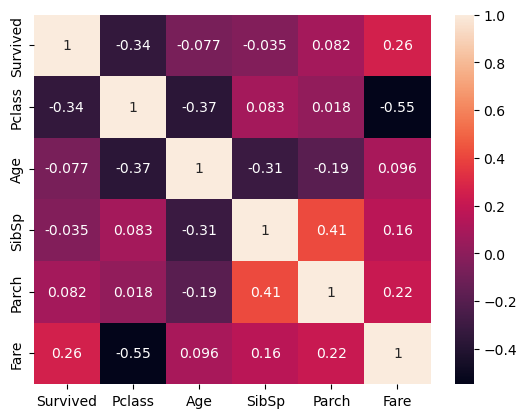

In [114]:
# Look at the correlation matrix using heatmap
sns.heatmap(data.corr(), annot=True)

* `Pclass` & `Fare` features has strongest correlation (+ve & -ve both matters) with `Survived` target feature
* `Pclass` is also strongly (-ve) correlated with `Fare` which 

In [115]:
# Look at the fare by different passenger class level
data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


* 75Q fare of `Pclass` = 3 is barely overlapping 25Q fare of `Pclass` = 2
* Similarly, 75Q fare of `Pclass` = 2 is infact lower than 25Q fare of `Pclass` = 1
So this shows string correlation between `Fare` & `Pclass`

In [116]:
def describe_num_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(data.groupby('Survived')[feature].describe())
    ttest(feature)
    print("\n\n")
    
def ttest(feature):
    '''
    This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
    This test assumes that the populations have identical variances by default.
    '''
    survived = data[data['Survived']==1][feature]
    not_survived = data[data['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [117]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_num_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23




*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan




*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233




*** Results for Parch ***
          count      

### Plot Continous Numerical Features

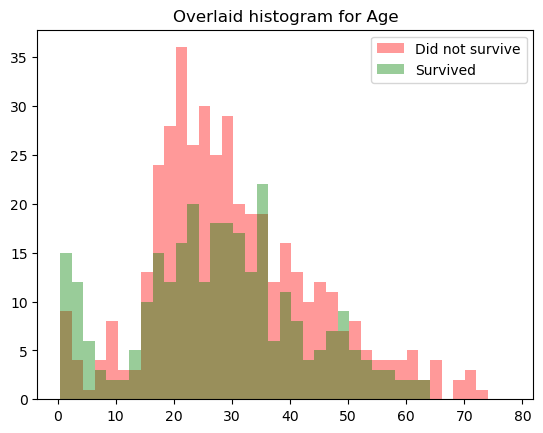

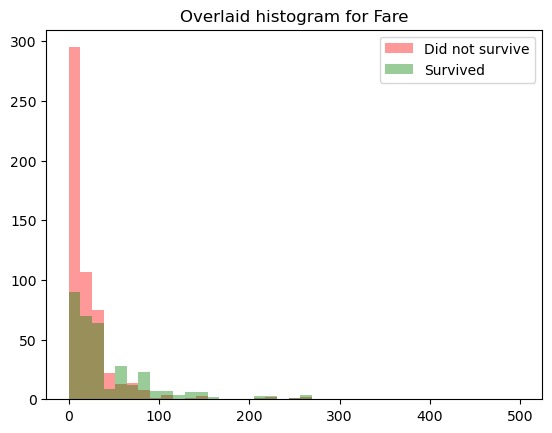

In [118]:
# Plot overlaid Histograms for numerical - continous features
for col in ['Age', 'Fare']:
    died = list(data[data['Survived'] == 0][col].dropna())
    survived = list(data[data['Survived'] == 1][col].dropna())
    
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40  # width of histogram
    
    sns.distplot(died, kde=False, color='r', bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, kde=False, color='g', bins=np.arange(xmin, xmax, width))
  
    plt.legend(['Did not survive', 'Survived'])
    plt.title("Overlaid histogram for {}".format(col))
    plt.show()

* Distribution of `Age` of those who survived vs those who didnt is more or less similar.
* Distribution of `Fare` is right skewed because of outliers at right tail

### Plot Discrete Numerical features

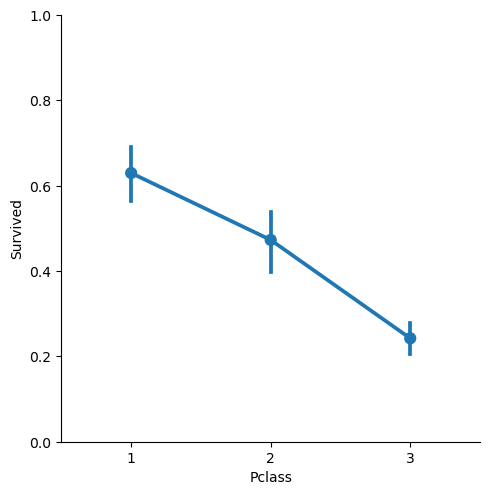

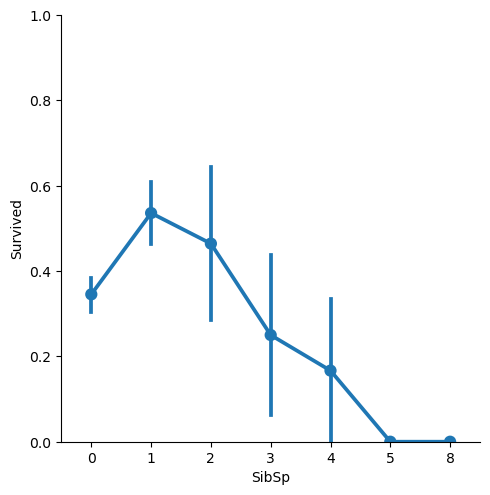

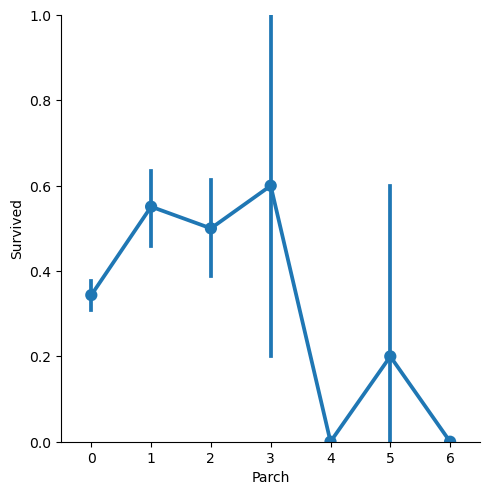

In [119]:
# Plot catplot for numerical - discrete features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=data, kind='point', aspect=1)
    plt.ylim(0,1)

* Roughly around 66% of `Pclass`1 passengers survived, followed by 45% for `Pclass`2, followed by 36% for `Pclass`3
* Passengers with more `SibSp`& `Parch` are less likely to survive. It seems to be co-related and hence can be combined

(0.0, 1.0)

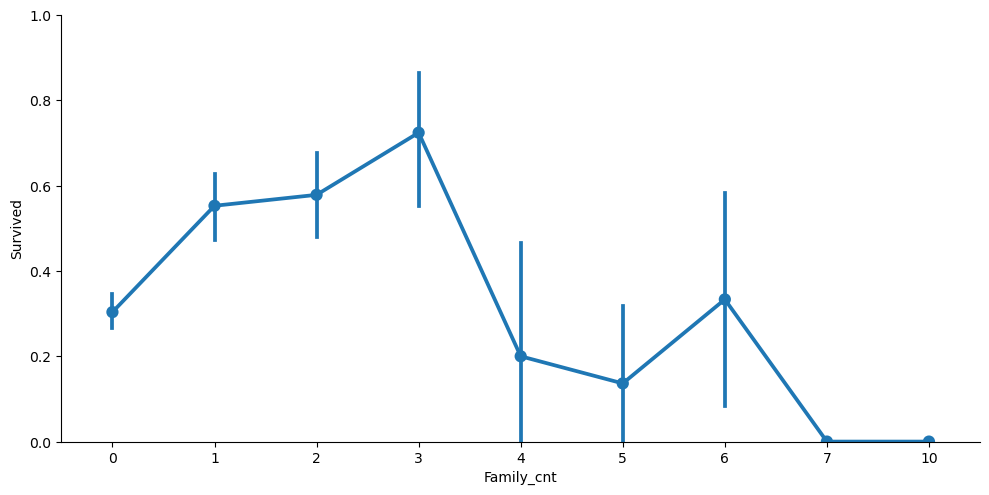

In [120]:
# Create a new family count feature
data['Family_cnt'] = data['SibSp'] + data['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=data, kind='point', aspect=2, )
plt.ylim(0, 1)

## Handling Missing Values

#### For Missing Values, we need to ask the below question:
* if values are missing at random -- means it just got missed to record
* if values are missing in some systematic way

In [121]:
# Look at the average value of each feature based on whether Age is missing
data.groupby(data['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


* `False` means Age is not missing & `True` means Age is missing
* Passengers without their `Àge` recorded didnt survived. So it means, missing age values has got to do with if someone will suvive or not. SO `Age` values are not missing in a systematic way, rather its missing in random.

We will explore this deeply later on

## Explore Categorical features

In [122]:
# read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# analyze categorical features `Name`, `Sex`, `Cabin`, `Embarked`
num_features = list(data.select_dtypes(exclude='object').columns)
num_features.remove(target_feature)
data.drop(num_features, axis=1, inplace=True)
data.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [124]:
# Check if there are any missing values
data.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

* About 75% records of `Cabin` have missing values
* `Embarked` has only 2 missing values

In [125]:
# Explore number of unique values for each features
for col in data.columns:
    print("{}: {} unique values".format(col, data[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


We can divide above into two groups. Groups with limited unique values and many unique values
* Limited unique values: `Sex` & `Embarked`
* Lot of unique values: `Name`, `Ticket` & `Cabin`

#### Limited unique values

In [126]:
# Check survival rate by Gender and Embarked port
for col in ['Sex', 'Embarked']:
    print("Survival rate by: {}".format(round(data.groupby(col)['Survived'].mean(),2)))
    print("\n")

Survival rate by: Sex
female    0.74
male      0.19
Name: Survived, dtype: float64


Survival rate by: Embarked
C    0.55
Q    0.39
S    0.34
Name: Survived, dtype: float64




* 74% of Female has survived whereas just 19% of Male has survived
* 55% of passengers embarked at `C` survived, followed by `Q` & `S` by 39% and 34% respectively.

However its too close to be sure that there's any real value here

#### Lots of unique values

In [127]:
# Is `Cabin` missing at random?
data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

* Cabin feature seems to be a very strong indicator whether someone will Survive or not.
* So, we will create a Indicator variable to grab this information to modelling phase

In [128]:
# Look at creating new feature Deck using the Cabin values
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'NA')
data.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Deck
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NA
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NA
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,NA


In [129]:
# look at the unique values for the Ticket feature
data['Ticket'].value_counts()



Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

* 681 unique values out of 891 records, seems to quite odd and would be difficult for the model to identify any signal (if any)
* value_counts() shows that Tickets values are assigned at random and it does not add any meaning to the dataset
* We will drop the `Ticket` column

In [130]:
# Create a title feature by parsing passenger name

data['Title_Raw'] = data['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
data['Title'] = data['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
data.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Deck,Title_Raw,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NA,Mr,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C,Mrs,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NA,Miss,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C,Mrs,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,NA,Mr,Mr


In [131]:
# Create a Cabin Indicator feature using Cabin feature

data['Cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
data.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Deck,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NA,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NA,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,NA,Mr,Mr,0


In [132]:
# Look at the survival rate by title
data.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
              Survived  Survived
Title  Sex                      
Master male         40  0.575000
Miss   female      182  0.697802
Mr     male        517  0.156673
Mrs    female      125  0.792000
Other  female        7  1.000000
       male         20  0.250000

### Plot Categorical Features

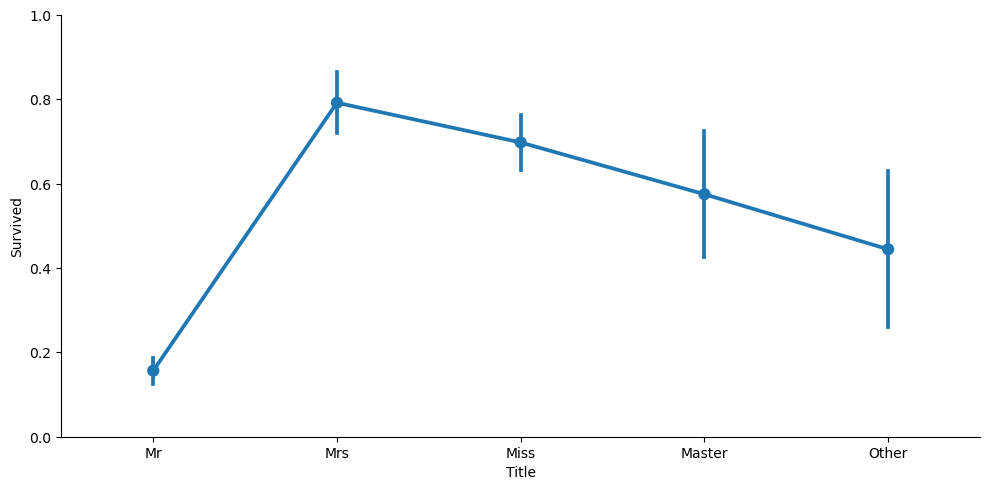

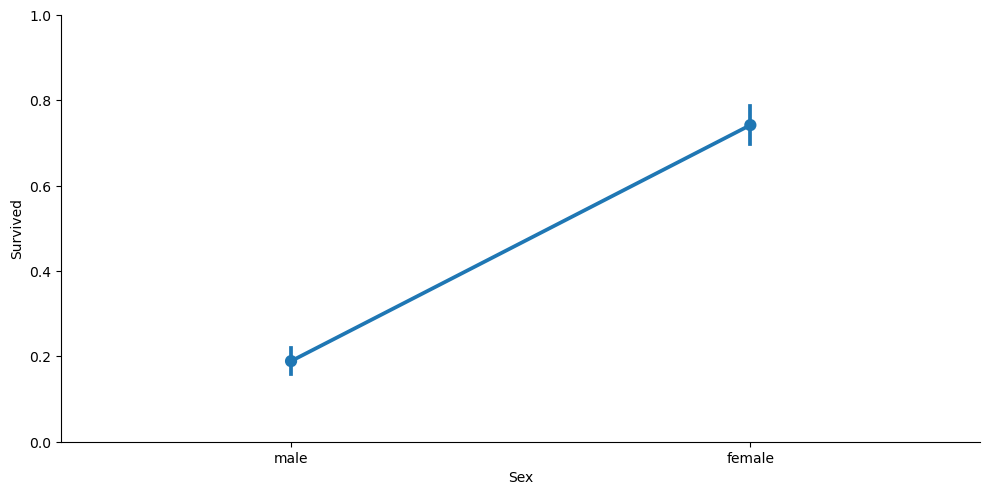

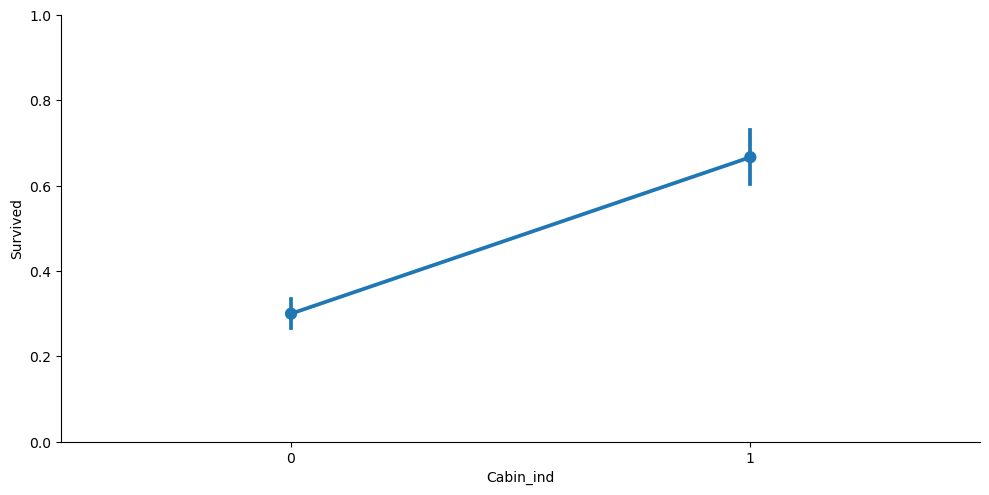

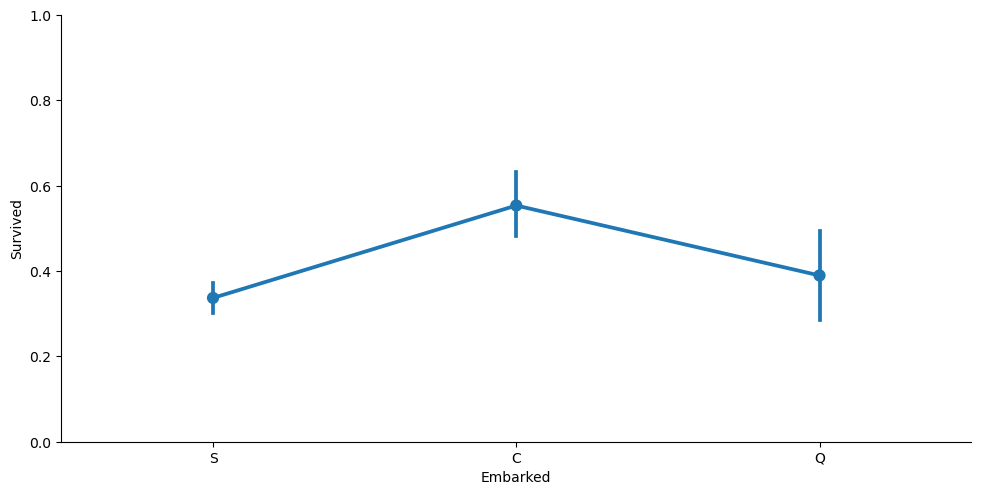

In [133]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=data, kind='point', aspect=2)
    plt.ylim(0,1)

* Mrs (80%), Miss (70%), Master(60%) have higher rate of survival than Mr(50%)
* Female have higher survival rate i.e. more than 70% whereas Male has just 20% chances. 
* Passengers with Cabin have 66% survival rate whereas those without Cabin have around 30% of survival rate. 
* Passengers boarded at C(Cherbourg) have higher chance of survival than S(Southampton) & Q(Queenstown).
* Now we see there is some seperation here, and the veritical bars of Cherbourg and Queenstown overlap each other.
We need to apply a bit of critical thnking here. Its unlikely that where they boarded caused them to survive or not. More then likely this is correlated with the other features that are already accounted for in our data.
For instance, a higher ratio of men boarded in Southampton, or may be Cherbourg is a more wealthy area than other two, where many passengers ended up having Cabins.
* Cabin_ind & Sex of passengers are two crucial features which are sufficient to check the survival rate

In [134]:
# Split embarked by whether the pasenger had a Cabin 

data.pivot_table(values='Survived', index='Cabin_ind', columns='Embarked', aggfunc=['count'])


count         
Embarked      C   Q    S
Cabin_ind               
0            99  73  515
1            69   4  129

So we have learned that
* Ratio of passengers in S is much higher than Q and C
* There are more passengers in S without Cabin compared to Q & C
* Title, Cabin_ind & Gender of passengers have very strong co-relation with Survival and could be really useful.
* Embarked is not really providing much information that isn't covered by other features in the model. Thus its repititive and not at all useful


## Key takeways from EDA

Lets take a look at the 10 features 

* `Name`: 
    * Name on its own wasnt that valuable to determine the likelihood of survival, so better to drop it.
    * However, newly created `Title` feaure from name might be a proxy for status and likely is related to survival of passengers.
* `Pclass`: 
    * Remained as `Pclass`
    *  `Fare` is correlated with `Pclass`. We need to keep in mind as we move forward
* `Sex`: 
    * Remained as `Sex` 
    * `Sex` is correlated with `Title`. We need to keep in mind as we move forward
* `Age`:
    * Remained as `Age`
* `SibSp` & `Parch`: 
    * Combined as `Family_cnt`
* `Ticket`:
    * We validated that ticket numbers where more or less random, so better to drop it.
* `Fare`:
    * Remained as `Fare`
    * Keep in mind `Fare` is correlated with `Pclass`
* `Cabin`:
    * We noticed that Cabin was missing for more than 75% of the passengers
    * We counld have assumed it was missing at random and could have dropped the feature
    * However, we discovered that there is a strong coorelation between whether the Cabin was missing and survival rate
    * Converted the feature from categorical value to a simple binary indicator `Cabin_ind`
* `Embarked`:
    * We analysed the ports from which passngers embarked and their likelihood of surviving.
    * We concluded that this is not a crucial factor and is correlated with other features which might be driving the factor here, so better to drop it.

## Creating and Cleaning Features: Handling Missing values in data
Three primary methods to treat missing values:
1. Impute to the median or mean of the feature
2. Model that feature to predict the missing values
3. Assign it some default values (e.g. Other or -999)

In [135]:
# read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/titanic_data.csv")

# Check where we have missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age - 177
* Cabin - 678
* Embarked - 2

### Fill Missing for `Age`

In [136]:
# Check if Age apears to be missing at random
obj_cols = list(data.select_dtypes(include='object').columns)
data_new = data.drop(columns=obj_cols, axis=1)
data_new.groupby(data_new['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [137]:
# Fill in Missing values for Age feature
# data['Age'] = np.where(data['Age'].isnull(), data['Age'].mean(), data['Age'])
data['Age_clean'] = data['Age'].fillna(data['Age'].mean())

In [138]:
# Ensure Age_clean feaure has no missing vaklues
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

### Fill Missing for `Embarked`

In [139]:
# Fill in Missing values for Embarked feature
data['Embarked_clean'] = data['Embarked'].fillna('O')

data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [140]:
# Write out data with missing values cleaned up
data.to_csv("data/titanic_no_missing.csv", index=False)

## Creating and Cleaning Features: Cap and Floor data to remove Outliers

In [141]:
# Read in data
data = pd.read_csv("data/titanic_no_missing.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C


### Remove Outliers

In [142]:
# See where outliers might be an issue
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [143]:
# Detect outliers using full range of values in a feature and comaring it with 95Q, 99Q & 3SDQ
def detect_outlier(feature):
    outliers = []
    datapoints = data[feature]

    mean= np.mean(datapoints)
    std = np.std(datapoints)

    for y in datapoints:
        z_score = (y - mean)/std

        if np.abs(z_score) > 3:  # Outlier is any datapoint greater than 3 Standard Deviation above the mean
            outliers.append(y)
    
    print("\nOutlier caps for {}".format(feature))
    print(" --95p: {:.1f} | {} values exceed that".format(datapoints.quantile(0.95),
                                                          len([i for i in datapoints if i > datapoints.quantile(0.95)])))
    
    print(" --3sd: {:.1f} | {} values exceed that".format(mean + 3 * (std), len(outliers)))
    
    print(" --99p: {:.1f} | {} values exceed that".format(datapoints.quantile(0.99),
                                                          len([i for i in datapoints if i > datapoints.quantile(0.99)])))


In [144]:
# Determine what the upperbound should be for continuous features
for feat in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age_clean
 --95p: 54.0 | 42 values exceed that
 --3sd: 68.7 | 7 values exceed that
 --99p: 65.0 | 8 values exceed that

Outlier caps for SibSp
 --95p: 3.0 | 30 values exceed that
 --3sd: 3.8 | 30 values exceed that
 --99p: 5.0 | 7 values exceed that

Outlier caps for Parch
 --95p: 2.0 | 15 values exceed that
 --3sd: 2.8 | 15 values exceed that
 --99p: 4.0 | 6 values exceed that

Outlier caps for Fare
 --95p: 112.1 | 45 values exceed that
 --3sd: 181.2 | 20 values exceed that
 --99p: 249.0 | 9 values exceed that


* Looking at the result there doesnt seems to be any extreme outliers.
* we can consider 99Q for `Age_clean` & `Fare` features
* we can leave `SibSp` and `Parch` as it is

In [145]:
# Cap features |  Upperbound is set to Maximum threshold value. All values above this threshold will be set to it.

data['Age_clean'].clip(upper=data['Age_clean'].quantile(0.99), inplace=True)
data['Fare_clean'] = data['Fare'].clip(upper=data['Fare'].quantile(0.99))

In [146]:
# Describe the dataframe again to make sure the capping was successful
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [147]:
# Write out capped data
data.to_csv("data/titanic_capped.csv", index=False)

## Creating and Cleaning Features: Transform Skewed Features

In [148]:
# Read in data
data = pd.read_csv("data/titanic_capped.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833


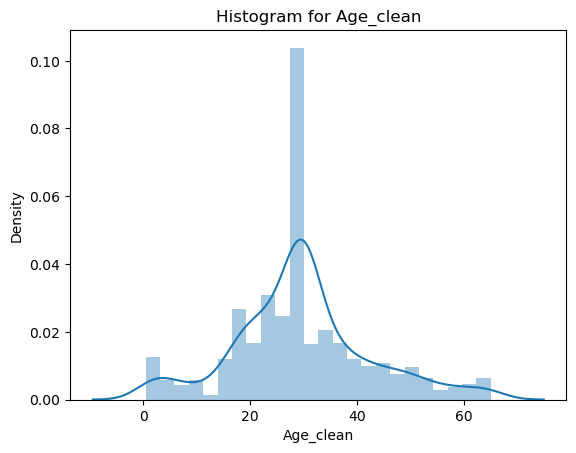

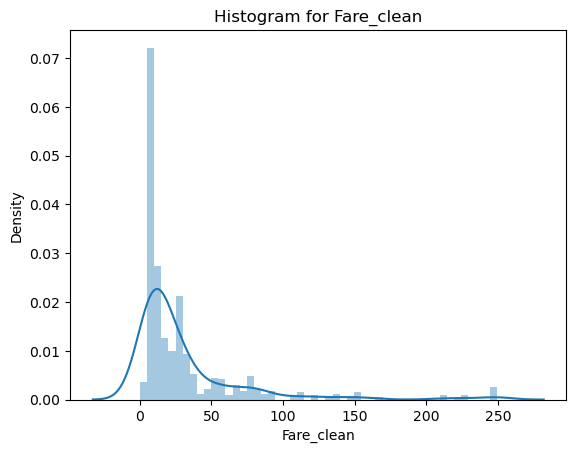

In [149]:
# Plot histogram for each continous features to see if a transformation is necessary
for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(data[feature], kde=True)
    plt.title("Histogram for {}".format(feature))
    plt.show()

* `Age_clean` seems to normally distributed so its pretty well behaved
* `Fare_clean` is right-skewed as it has got right long tail. Previously, we capped it which reduced the right tail from 500+ to 240+ but still its skewed. Lets try some transformation to pull that tail inside


### Box-Cox Power Transformation


**Base Form** 
#### $$ y^x $$

Power ranging from -2, -1, -0.5, 0, 0.5, 1, 2

| X    | Base Form           |           Transformation               |
|:------:|:--------------------------:|:--------------------------:|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

**Example (Using Fare)**

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

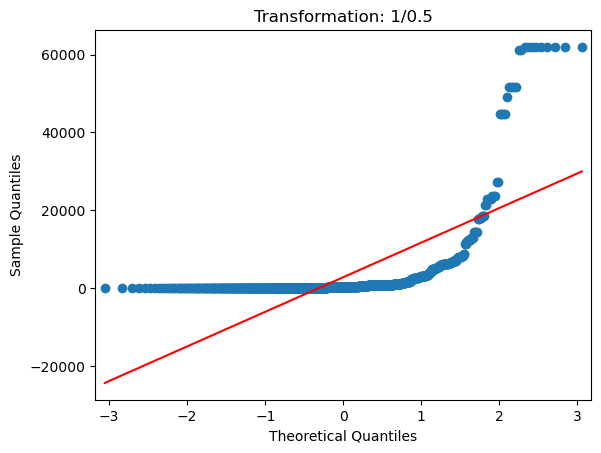

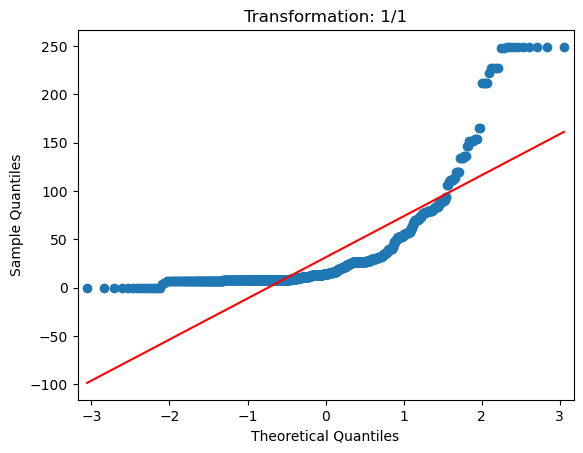

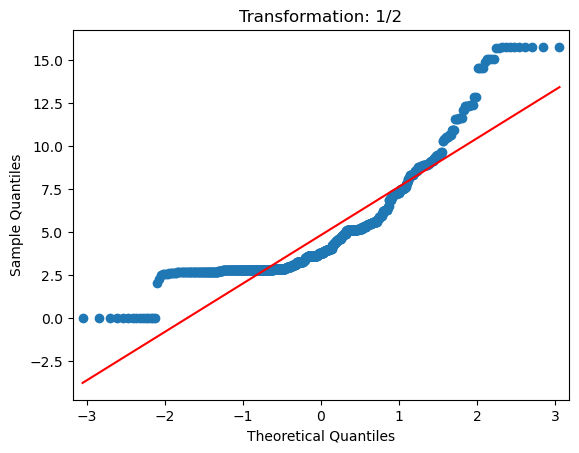

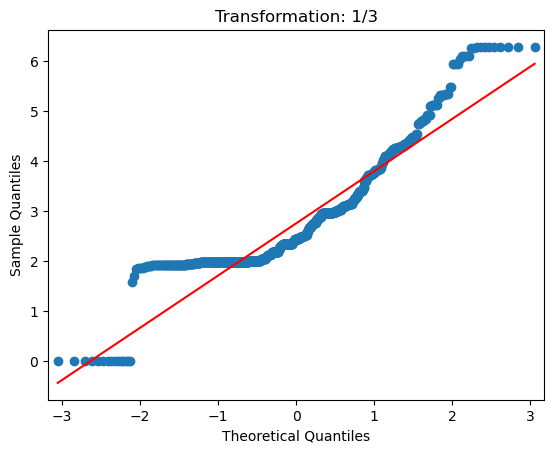

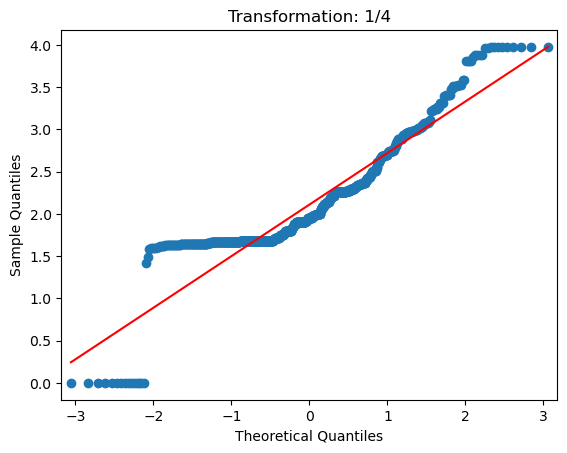

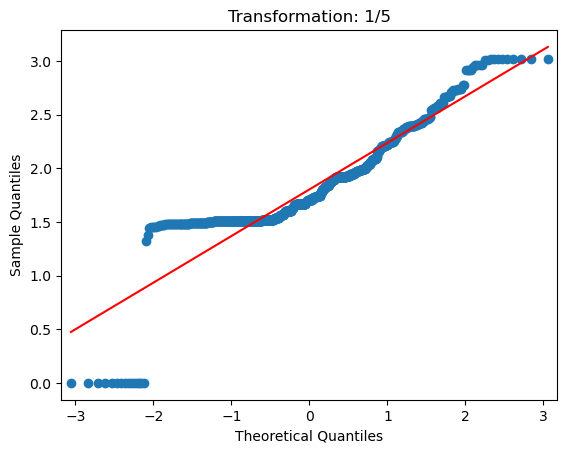

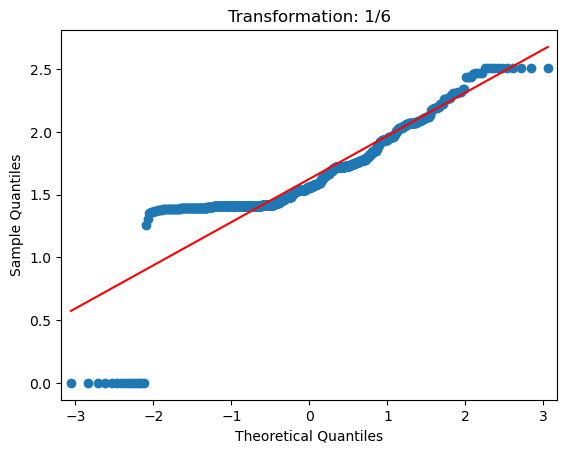

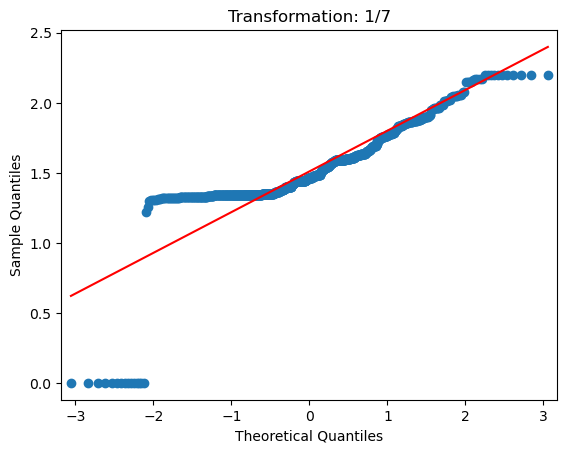

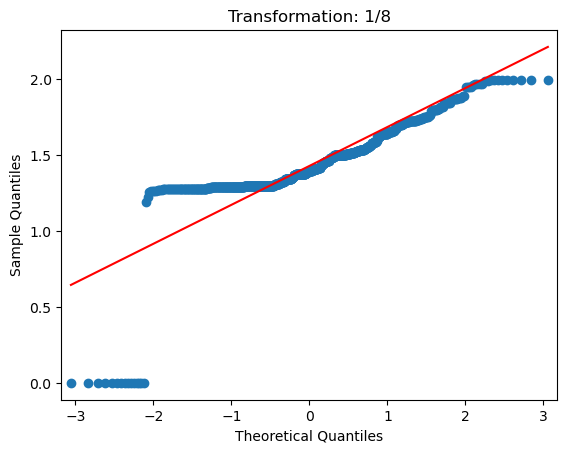

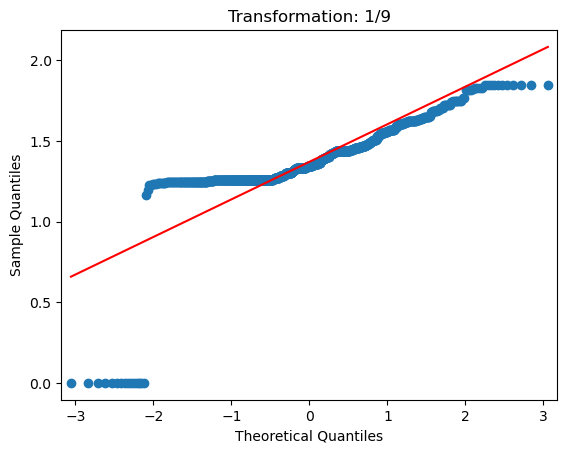

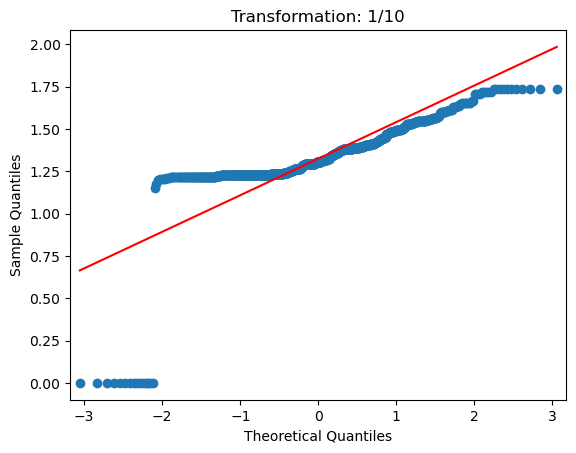

In [150]:
# Generate QQ Plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(i))
    plt.show()

* with 1/5 or 1/6 transformation, `Fare_clean` seems to be normally distributed

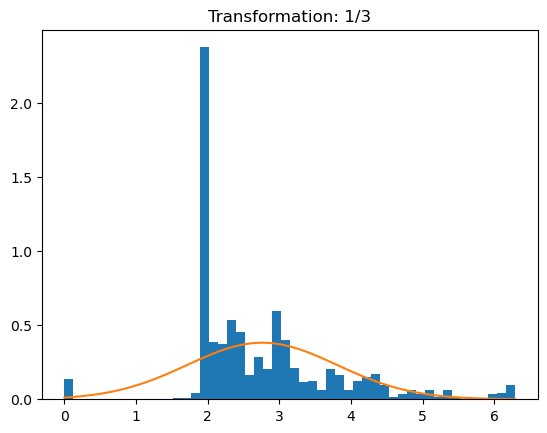

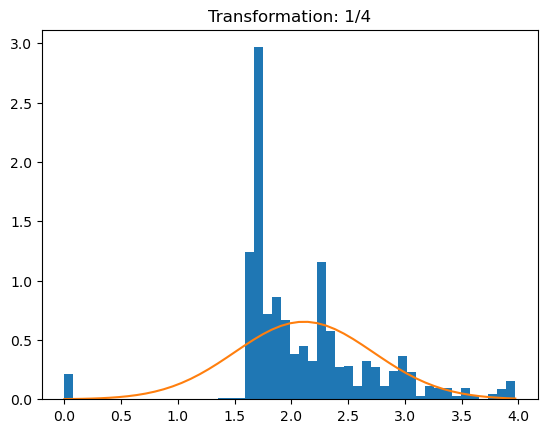

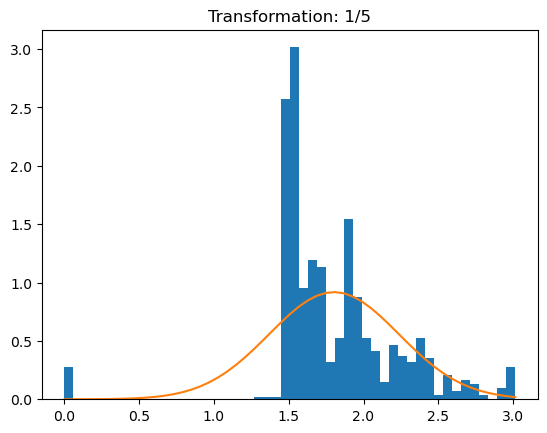

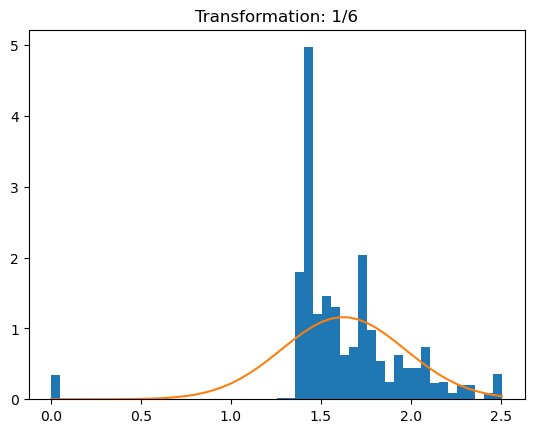

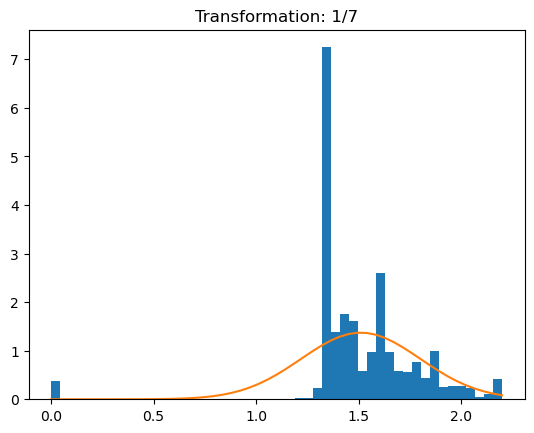

In [151]:
# Box-Cox Tranformation
for i in [3,4,5,6,7]:
    data_t = data['Fare_clean']**(1/i)
    _, bins, _ = plt.hist(data_t, 50, density=True)

    mean = np.mean(data_t)
    std = np.std(data_t)
    plt.plot(bins, stats.norm.pdf(bins, mean, std))

    
    plt.title("Transformation: 1/{}".format(i))
    plt.show()

* with 1/5 transformation, `Fare_clean` seems to be normally distributed

In [152]:
# Create new transformed feature using (1/5) as tranformation factor from above experiment
data['Fare_clean_tr'] = data['Fare_clean'].apply(lambda x: x**(1/5))
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457


In [153]:
# Write out transformed data
data.to_csv("data/titanic_transformed.csv", index=False)

## Creating and Cleaning Features: Create New Features from Text

In [154]:
# Read the data
data = pd.read_csv("data/titanic_transformed.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457


In [155]:
# Create a Title feature by parsing passenger name
data['Title'] = data['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs


In [156]:
# Look at the survival rate by title
data.pivot_table(values='Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [157]:
# Write out updated data
data.to_csv("data/titanic_title_feature.csv", index=False)

## Creating And Cleaning Features: Create Indicator

In [158]:
# read in data
data = pd.read_csv("data/titanic_title_feature.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs


In [159]:
# What would an indicator variable for Cabin look like?

data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [160]:
# Create indicator feature
data['Cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1


In [161]:
# Write out updated data
data.to_csv("data/titanic_cabin_ind.csv", index=False)

## Creating And Cleaning Features: Combine Existing Features into New Feature

In [162]:
# read in data
data = pd.read_csv("data/titanic_cabin_ind.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1


### Combine `SibSp` & `Parch` into `Family_cnt` feature

In [163]:
data['Family_cnt'] = data['SibSp'] + data['Parch']
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1


In [164]:
# Write out updated data
data.to_csv("data/titanic_family_cnt.csv", index=False)

## Creating And Cleaning Features: Convert Categorical Features to Numeric

In [165]:
# read in data
data = pd.read_csv("data/titanic_family_cnt.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1


In [166]:
# Convert Categorical features into numeric features
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [167]:
# Write out updated data
data.to_csv("data/titanic_numeric.csv", index=False)

## Prepare Features for Modeling: Create Training and Test Sets

In [168]:
# read in data
data = pd.read_csv("data/titanic_numeric.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1


### Drop Unncessary features

In [169]:
features = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
labels = data['Survived']

In [170]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,3,1,22.0,1,0,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,1,0,38.0,1,0,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,0,26.0,0,0,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,1,0,35.0,1,0,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,3,1,35.0,0,0,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [171]:
labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [172]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [173]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [174]:
# Checkout the percentage of dataset final into train, val & test
for dataset in [y_train, y_val, y_test]:
    print("{} %".format(round(len(dataset)/len(labels), 2)))

0.6 %
0.2 %
0.2 %


In [175]:
# Write out all the data

X_train.to_csv("data/split_data/train_features.csv", index=False)
X_val.to_csv("data/split_data/val_features.csv", index=False)
X_test.to_csv("data/split_data/test_features.csv", index=False)

y_train.to_csv("data/split_data/train_labels.csv", index=False)
y_val.to_csv("data/split_data/val_labels.csv", index=False)
y_test.to_csv("data/split_data/test_labels.csv", index=False)

## Prepare Features for Modeling: Standardize All Features

In [176]:
# read in data

data_train = pd.read_csv("data/split_data/train_features.csv")
data_val = pd.read_csv("data/split_data/val_features.csv")
data_test = pd.read_csv("data/split_data/test_features.csv")


In [177]:
data_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


* We can see that `Age` is on different scale `Fare`, and similarly for other features too 
* So standardization is required

### Standardize Features

In [178]:
# Fit the scaler on training data
scaler = StandardScaler()  # Standard Scaler rescales the dataset to have Mean = 0 and Std = 1
scaler.fit(data_train)

StandardScaler()

In [179]:
# Scale the training, test & Validation datasets

features = data_train.columns

data_train[features] = scaler.transform(data_train[features])
data_val[features] = scaler.transform(data_val[features])
data_test[features] = scaler.transform(data_test[features])

data_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
1,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
2,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
3,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
4,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


In [180]:
# Define the list of features to be used for each dataset

# All original features along with categorical features converted to numerical features
raw_original_features = ["Pclass", "Sex", "Age_clean", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]

# Minimum feature engineering applied features with just filling in missing values and flooring/capping outliers
cleaned_original_features = ["Pclass", "Sex", "Age_clean", "SibSp", "Parch", "Fare_clean", "Cabin", "Embarked_clean"]

# Cleaned version of original features (from above) along with newly created features
all_features = ["Pclass", "Sex", "Age_clean", "SibSp", "Parch", "Fare_clean", "Fare_clean_tr", "Cabin", "Cabin_ind", "Embarked_clean", "Title", "Family_cnt"]

# These are list of features which through our analysis we found to be most useful ones
reduced_features = ["Pclass", "Sex", "Age_clean", "Family_cnt", "Fare_clean_tr", "Cabin_ind", "Title"]

In [181]:
# Write out the final data for each features set

data_train[raw_original_features].to_csv("data/final_data/train_features_raw.csv", index=False)
data_val[raw_original_features].to_csv("data/final_data/val_features_raw.csv", index=False)
data_test[raw_original_features].to_csv("data/final_data/test_features_raw.csv", index=False)

data_train[cleaned_original_features].to_csv("data/final_data/train_features_original.csv", index=False)
data_val[cleaned_original_features].to_csv("data/final_data/val_features_original.csv", index=False)
data_test[cleaned_original_features].to_csv("data/final_data/test_features_original.csv", index=False)

data_train[all_features].to_csv("data/final_data/train_features_all.csv", index=False)
data_val[all_features].to_csv("data/final_data/val_features_all.csv", index=False)
data_test[all_features].to_csv("data/final_data/test_features_all.csv", index=False)

data_train[reduced_features].to_csv("data/final_data/train_features_reduced.csv", index=False)
data_val[reduced_features].to_csv("data/final_data/val_features_reduced.csv", index=False)
data_test[reduced_features].to_csv("data/final_data/test_features_reduced.csv", index=False)

In [182]:
# Read in all labels
data_train_labels = pd.read_csv("data/split_data/train_labels.csv")
data_val_labels = pd.read_csv("data/split_data/val_labels.csv")
data_test_labels = pd.read_csv("data/split_data/test_labels.csv")

In [183]:
# Write out labels to final directory

data_train_labels.to_csv("data/final_data/train_labels.csv", index=False)
data_val_labels.to_csv("data/final_data/val_labels.csv", index=False)
data_test_labels.to_csv("data/final_data/test_labels.csv", index=False)

## Build Models To Compare Features: Raw Original Features

## GridSearchCV

In [184]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))

    means = results.cv_results_['mean_test_score'] 
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("{} (+/-{}) for {}".format(round(mean, 3), round(std*2, 3), params))

In [185]:
train_features = pd.read_csv("data/final_data/train_features_raw.csv")
train_labels = pd.read_csv("data/final_data/train_labels.csv")

train_features.head(2)

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.412724,0.450064,0.573494
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.066661,0.450064,-0.718682


<Axes: >

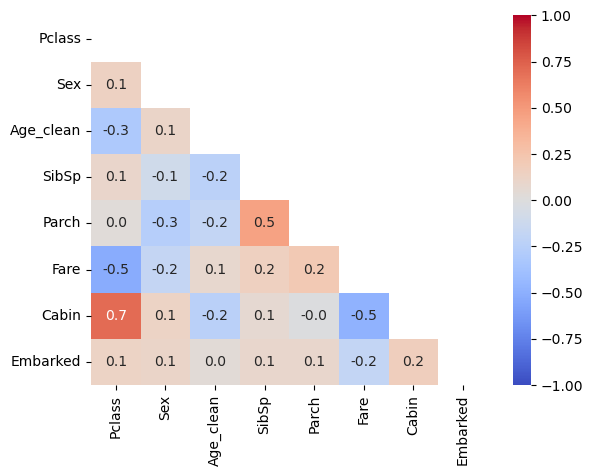

In [186]:
# Generate Correlation matrix heat map

matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [187]:
# Conduct search for best params while runninf Cross-Validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3,10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.768 (+/-0.123) for {'max_depth': 2, 'n_estimators': 8}
0.779 (+/-0.091) for {'max_depth': 2, 'n_estimators': 16}
0.803 (+/-0.114) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.087) for {'max_depth': 2, 'n_estimators': 64}
0.792 (+/-0.095) for {'max_depth': 2, 'n_estimators': 128}
0.8 (+/-0.104) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.113) for {'max_depth': 2, 'n_estimators': 512}
0.817 (+/-0.113) for {'max_depth': 4, 'n_estimators': 8}
0.807 (+/-0.113) for {'max_depth': 4, 'n_estimators': 16}
0.811 (+/-0.089) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.115) for {'max_depth': 4, 'n_estimators': 64}
0.817 (+/-0.109) for {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-0.086) for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.12) for {'max_depth': 4, 'n_estimators': 512}
0.818 (+/-0.096) for {'max_depth': 8, 'n_estimators': 8}
0.833 (+/-0.074) for {'max_depth': 8, 'n_estimators': 16}
0.828 (+/-0.067) for {

### Feature Importance

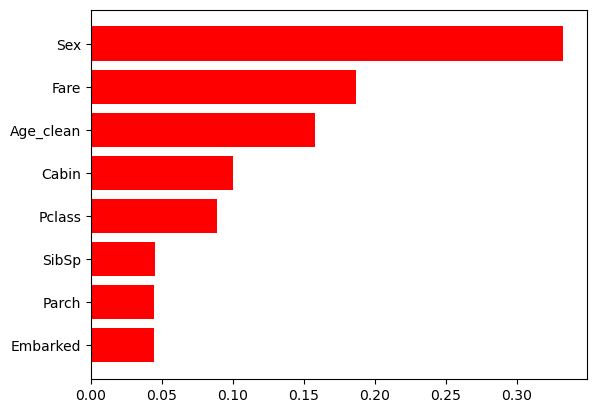

In [188]:
# Generate feature importance plot

feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)

plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

Descending order of Feature Importance

    Sex > Fare > Age_clean > Cabin > Pclass > SibSp > Parch > Embarked

In [189]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, "data/models/mdl_raw_original_features.pkl")

['data/models/mdl_raw_original_features.pkl']

## Build Models To Compare Features: Cleaned Original Features

In [190]:
train_features = pd.read_csv("data/final_data/train_features_original.csv")
train_labels = pd.read_csv("data/final_data/train_labels.csv")

train_features.head(2)

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,0.450064,0.545364
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.450064,-0.334468


<Axes: >

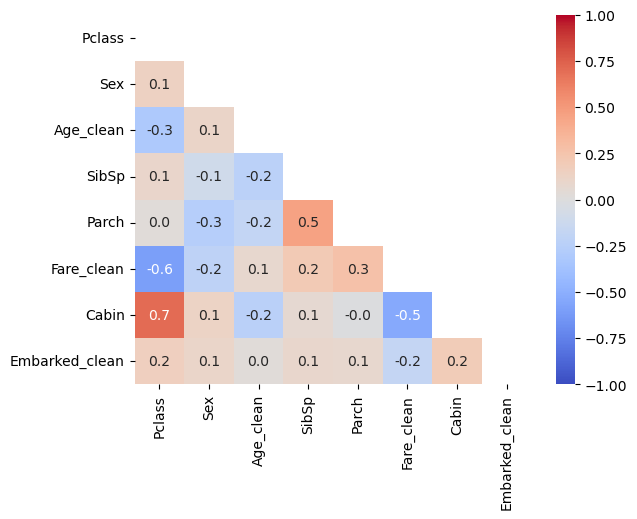

In [191]:
# Generate Correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [192]:
# Conduct search for best params while runninf Cross-Validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3,10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 128}

0.77 (+/-0.165) for {'max_depth': 2, 'n_estimators': 8}
0.792 (+/-0.122) for {'max_depth': 2, 'n_estimators': 16}
0.787 (+/-0.107) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.092) for {'max_depth': 2, 'n_estimators': 64}
0.794 (+/-0.113) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.101) for {'max_depth': 2, 'n_estimators': 256}
0.79 (+/-0.107) for {'max_depth': 2, 'n_estimators': 512}
0.804 (+/-0.118) for {'max_depth': 4, 'n_estimators': 8}
0.815 (+/-0.099) for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.125) for {'max_depth': 4, 'n_estimators': 32}
0.828 (+/-0.114) for {'max_depth': 4, 'n_estimators': 64}
0.826 (+/-0.1) for {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-0.118) for {'max_depth': 4, 'n_estimators': 256}
0.826 (+/-0.108) for {'max_depth': 4, 'n_estimators': 512}
0.822 (+/-0.065) for {'max_depth': 8, 'n_estimators': 8}
0.83 (+/-0.077) for {'max_depth': 8, 'n_estimators': 16}
0.835 (+/-0.067) for {'

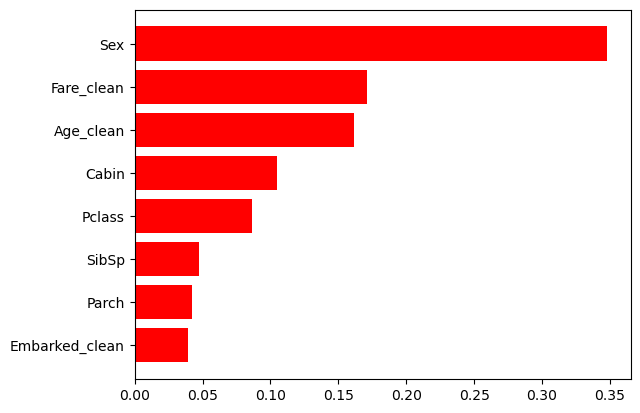

In [193]:
# Generate feature importance plot

feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)

plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

Descending order of Feature Importance

    Sex > Fare_clean > Age_clean > Cabin > Pclass > SibSp > Parch > Embarked_clean

In [194]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, "data/models/mdl_cleaned_original_features.pkl")

['data/models/mdl_cleaned_original_features.pkl']

## Build Models To Compare Features: All Features

In [195]:
train_features = pd.read_csv("data/final_data/train_features_all.csv")
train_labels = pd.read_csv("data/final_data/train_labels.csv")

train_features.head(2)

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639


<Axes: >

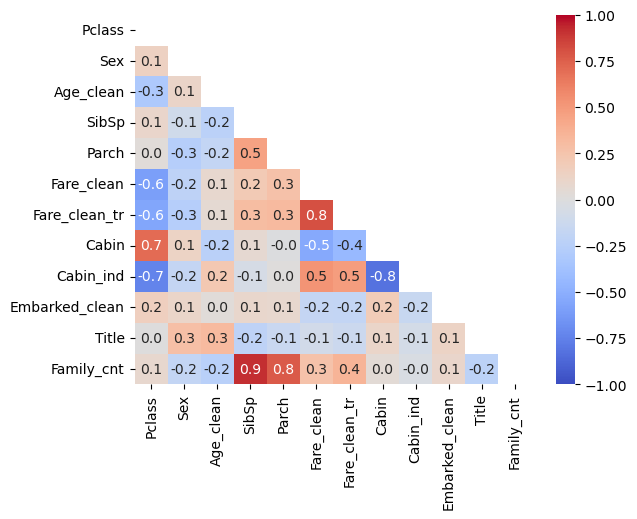

In [196]:
# Generate Correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [197]:
# Conduct search for best params while runninf Cross-Validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3,10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.79 (+/-0.13) for {'max_depth': 2, 'n_estimators': 8}
0.787 (+/-0.139) for {'max_depth': 2, 'n_estimators': 16}
0.788 (+/-0.109) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.128) for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.115) for {'max_depth': 2, 'n_estimators': 128}
0.79 (+/-0.123) for {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-0.125) for {'max_depth': 2, 'n_estimators': 512}
0.811 (+/-0.081) for {'max_depth': 4, 'n_estimators': 8}
0.824 (+/-0.091) for {'max_depth': 4, 'n_estimators': 16}
0.832 (+/-0.048) for {'max_depth': 4, 'n_estimators': 32}
0.828 (+/-0.08) for {'max_depth': 4, 'n_estimators': 64}
0.828 (+/-0.092) for {'max_depth': 4, 'n_estimators': 128}
0.824 (+/-0.097) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.08) for {'max_depth': 4, 'n_estimators': 512}
0.822 (+/-0.061) for {'max_depth': 8, 'n_estimators': 8}
0.832 (+/-0.061) for {'max_depth': 8, 'n_estimators': 16}
0.832 (+/-0.073) for {'m

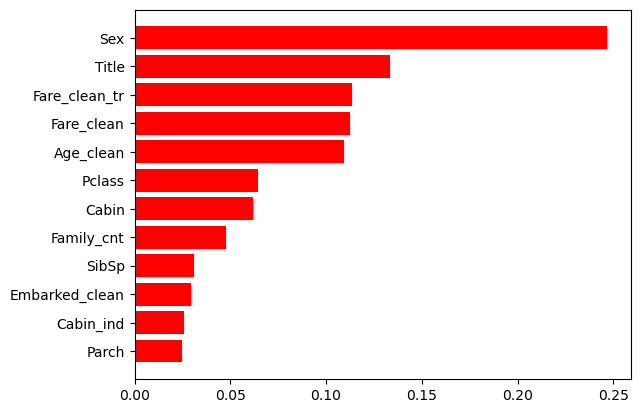

In [198]:
# Generate feature importance plot

feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)

plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

Descending order of Feature Importance

    Sex > Title > Fare_clean_tr > Age_clean > Fare_clean > Pclass > Cabin > Family_cnt > Embarked_clean > Parch >  SibSp > Cabin_ind

In [199]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, "data/models/mdl_all_features.pkl")

['data/models/mdl_all_features.pkl']

## Build Models To Compare Features: Reduced Set of Features

In [200]:
train_features = pd.read_csv("data/final_data/train_features_reduced.csv")
train_labels = pd.read_csv("data/final_data/train_labels.csv")

train_features.head(2)

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,-0.408652,0.737125,2.570771,-0.540385,-0.446199,-0.544166,0.430223
1,0.803682,0.737125,-1.673694,2.277639,0.373863,-0.544166,-1.784129


<Axes: >

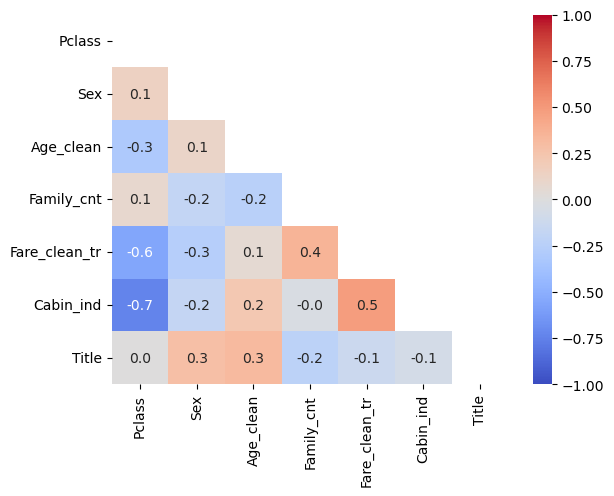

In [201]:
# Generate Correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [202]:
# Conduct search for best params while runninf Cross-Validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3,10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 16}

0.768 (+/-0.079) for {'max_depth': 2, 'n_estimators': 8}
0.777 (+/-0.123) for {'max_depth': 2, 'n_estimators': 16}
0.783 (+/-0.13) for {'max_depth': 2, 'n_estimators': 32}
0.789 (+/-0.118) for {'max_depth': 2, 'n_estimators': 64}
0.788 (+/-0.114) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.108) for {'max_depth': 2, 'n_estimators': 256}
0.792 (+/-0.113) for {'max_depth': 2, 'n_estimators': 512}
0.817 (+/-0.106) for {'max_depth': 4, 'n_estimators': 8}
0.826 (+/-0.058) for {'max_depth': 4, 'n_estimators': 16}
0.82 (+/-0.111) for {'max_depth': 4, 'n_estimators': 32}
0.815 (+/-0.103) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.104) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.101) for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.109) for {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-0.067) for {'max_depth': 8, 'n_estimators': 8}
0.817 (+/-0.079) for {'max_depth': 8, 'n_estimators': 16}
0.822 (+/-0.046) for {

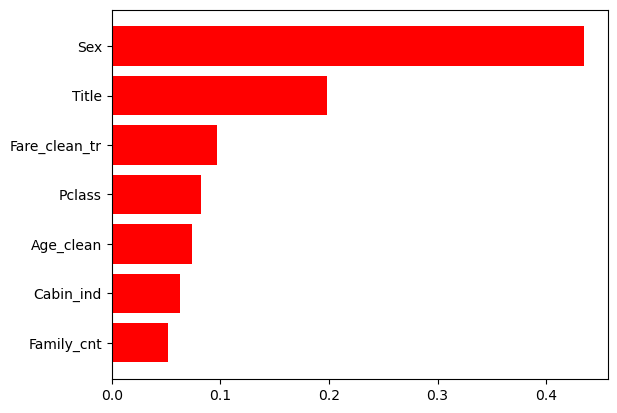

In [203]:
# Generate feature importance plot

feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)

plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

Descending order of Feature Importance

    Sex > Title > Pclass > Fare_clean_tr > Age_clean > Cabin_ind > Family_cnt

In [204]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, "data/models/mdl_reduced_features.pkl")

['data/models/mdl_reduced_features.pkl']

## Build Models to Compare Features: Compare And Evaluate All Models

1. Evaluate all the saved models on the Validation set
2. Select the best model based on performance on Validation set
3. Evaluate that model on the holdout test set

In [205]:
# read in validation datasets

val_features_raw = pd.read_csv("data/final_data/val_features_raw.csv")
val_features_original = pd.read_csv("data/final_data/val_features_original.csv")
val_features_all = pd.read_csv("data/final_data/val_features_all.csv")
val_features_reduced = pd.read_csv("data/final_data/val_features_reduced.csv")

val_labels = pd.read_csv("data/final_data/val_labels.csv")

val_features_raw.head(2)

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-1.620987,-1.356623,0.031883,0.325139,-0.468427,1.047786,-1.239700,-2.010857
1,-1.620987,0.737125,1.273851,-0.464063,-0.468427,-0.078274,-2.070731,0.573494


### Read In Models

In [206]:
# read in models
models = {}

for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load("data/models/mdl_{}_features.pkl".format(mdl))

## Evaluate Models On The Validation Set

In [207]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()

    accuracy = round(accuracy_score(y_true=labels, y_pred=pred), 3)
    precision = round(precision_score(y_true=labels, y_pred=pred), 3)
    recall = round(recall_score(y_true=labels, y_pred=pred), 3)
    f1 = round(f1_score(y_true=labels, y_pred=pred), 3)
    roc_auc = round(roc_auc_score(y_true=labels, y_score=pred), 3)

    print("{} -- \tAccuracy: {} | Precision: {} | Recall: {} | F1: {} | ROC-AUD: {} | Latency: {}ms".format(
        name, accuracy, precision, recall, f1, roc_auc, round((end-start), 2)
    ))

In [208]:
# Evaluate all of our models on validation set

evaluate_model("Raw Features", models['raw_original'], val_features_raw, val_labels)
evaluate_model("Cleaned Features", models['cleaned_original'], val_features_original, val_labels)
evaluate_model("All Features", models['all'], val_features_all, val_labels)
evaluate_model("Reduced Features", models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.809 | Precision: 0.792 | Recall: 0.646 | F1: 0.712 | ROC-AUD: 0.774 | Latency: 0.06ms
Cleaned Features -- 	Accuracy: 0.815 | Precision: 0.808 | Recall: 0.646 | F1: 0.718 | ROC-AUD: 0.779 | Latency: 0.01ms
All Features -- 	Accuracy: 0.831 | Precision: 0.797 | Recall: 0.723 | F1: 0.758 | ROC-AUD: 0.808 | Latency: 0.06ms
Reduced Features -- 	Accuracy: 0.803 | Precision: 0.759 | Recall: 0.677 | F1: 0.715 | ROC-AUD: 0.777 | Latency: 0.0ms


On the basis of all the scores we will pick the best two models which are 'All Features' & 'Reduced Features'

* If latency is not of a concern, then we can go with `All Features - model`
* If latency is a critical aspect of selecting the model, then we can go with `Reduced Features - model`

In case of Titanic problem statement, latency is not a critical factor, so we will choose to go ahead with `All Features - model`

## Evaluate Models On The Test Set

In [209]:
# read in test datasets 
''' 
NOTE: We should see performance that aligns fairly closely with the Validation set. 
The reason we evaluate on Validation set & the Test set is because we used perfomatnce on the validation set
to select out best model. So, in a sense Validation set played a important role in model selection process.
Now, Test set was used in any of the above process, so its a completely unbiased view of how we can expect this
model to perform on unseen data moving forward.
'''

test_features = pd.read_csv("data/final_data/test_features_all.csv")
test_labels = pd.read_csv("data/final_data/test_labels.csv")

val_features_raw.head(2)

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-1.620987,-1.356623,0.031883,0.325139,-0.468427,1.047786,-1.239700,-2.010857
1,-1.620987,0.737125,1.273851,-0.464063,-0.468427,-0.078274,-2.070731,0.573494


In [210]:
# Evaluate our final model on test set

evaluate_model("All Features", models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.816 | Precision: 0.831 | Recall: 0.711 | F1: 0.766 | ROC-AUD: 0.802 | Latency: 0.06ms


### Conclusion:
* We have explored around 100 candidates model accross four different features sets to try to find best model for Titanic dataset
* We finally narrowed it down to the model built on `All Features` with **512 estimators** and **max depth of 8**.
* We have robustly tested this model by evaluating on completely unseen data which generated an 
    * **Accuarcy of 83.1% on Validation dataset**
    * **Accuracy of 81.6% on Test dataset**.
* We are confident on proposing this model as the best model for prediction on whether people onboarding Titanic would survive or not.